In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tabpfn import TabPFNClassifier

In [2]:
dataset= pd.read_csv("./merged_data.csv")
dataset["activity"].value_counts()

sitting       1273
walking       1224
squats         555
standing       504
lying          492
downstairs     357
upstairs       284
jogging        273
Name: activity, dtype: int64

In [3]:
filtered_df = dataset[dataset['activity'].isin(['sitting', 'walking'])]

In [4]:
df1 = filtered_df.drop(['acc_x_wilson_amp', 'acc_x_mpf', 'acc_y_mpf', 'acc_z_mpf', 'acc_x_entropy', 'acc_y_entropy', 'acc_z_entropy', 
                    'acc_z_enwacto_1', 'acc_z_enwacto_2', 'acc_z_enwacto_3', 'acc_z_enwacto_4', 'acc_z_enwacto_5', 'acc_z_enwacto_6', 
                    'acc_z_enwacto_7', 'acc_y_enwacto_1', 'acc_y_enwacto_2', 'acc_y_enwacto_3', 'acc_y_enwacto_4', 'acc_y_enwacto_5', 'acc_y_enwacto_6',
                    'acc_y_enwacto_7', 'acc_x_enwacto_1', 'acc_x_enwacto_2', 'acc_x_enwacto_3', 'acc_x_enwacto_4', 'acc_x_enwacto_5', 'acc_x_enwacto_6',
                    'acc_x_enwacto_7'], axis=1)

wOkuba = df1[~df1['name'].str.lower().str.contains('kuba')].drop(columns=['name'], axis=1)
kuba = df1[df1['name'].str.lower().str.contains('kuba')].drop(columns=['name'], axis=1)

X_train = wOkuba.drop(columns=['activity'])
Y_train =  np.ravel(wOkuba[['activity']])
X_test = kuba.drop(columns=['activity'])
Y_test = np.ravel(kuba[['activity']])

F:\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy 1.0


Text(34.0, 0.5, 'True Labels')

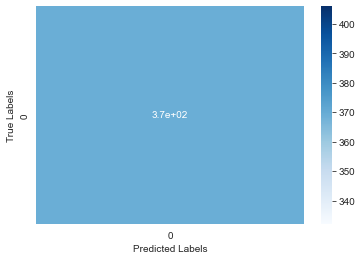

In [6]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=42, tol=1e-5, max_iter=1000)
clf.fit(X_train,Y_train)
score = clf.score(X_test, Y_test)
y_eval = clf.predict(X_test)
print('Accuracy', score)
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
Accuracy 0.6666666666666666


Text(33.0, 0.5, 'True Labels')

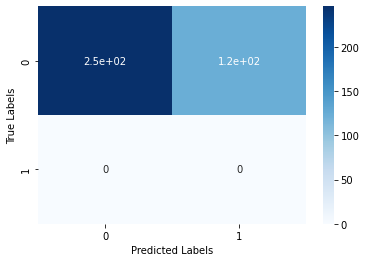

In [31]:
classifier = TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
classifier.fit(X_train, Y_train, overwrite_warning=True)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)

print('Accuracy', accuracy_score(Y_test, y_eval))
confusion_mat = confusion_matrix(Y_test, y_eval)
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")